In [1]:
import matplotlib.pyplot as plt
import numpy as np
from src.datasets import NoisySpectralSpeechDataset
import torch

In [2]:
arr = np.random.random([5,5])
arr

array([[0.14303413, 0.75683261, 0.92709002, 0.24456338, 0.71033501],
       [0.51061512, 0.76377529, 0.52870435, 0.21811563, 0.9867872 ],
       [0.9972901 , 0.81954021, 0.70324791, 0.11713044, 0.95633491],
       [0.25780683, 0.73493132, 0.0946914 , 0.27015457, 0.99568813],
       [0.15140869, 0.47809368, 0.27608209, 0.12737281, 0.28741097]])

In [3]:
mean = arr.mean()
mean

0.5222814724748792

In [4]:
centred_arr = arr - mean
centred_arr.mean()

1.3322676295501878e-16

In [5]:
arr_max = np.abs(centred_arr).max()
arr_max

0.47500862916949005

In [6]:
norm_arr = centred_arr / arr_max
norm_arr

array([[-0.79840096,  0.4937829 ,  0.85221304, -0.58465905,  0.395895  ],
       [-0.02456029,  0.50839881,  0.0135216 , -0.64033751,  0.97788904],
       [ 1.        ,  0.6257965 ,  0.38097506, -0.85293405,  0.91378012],
       [-0.55677861,  0.44767575, -0.90017326, -0.53078383,  0.99662748],
       [-0.78077062, -0.09302525, -0.51830507, -0.83137156, -0.49445523]])

In [7]:
norm_arr.mean()

2.886579864025407e-16

In [8]:
def norm(arr):
    mean = arr.mean()
    centred_arr = arr - mean
    arr_max = np.abs(centred_arr).max()
    return centred_arr / arr_max

In [9]:
norm(arr)

array([[-0.79840096,  0.4937829 ,  0.85221304, -0.58465905,  0.395895  ],
       [-0.02456029,  0.50839881,  0.0135216 , -0.64033751,  0.97788904],
       [ 1.        ,  0.6257965 ,  0.38097506, -0.85293405,  0.91378012],
       [-0.55677861,  0.44767575, -0.90017326, -0.53078383,  0.99662748],
       [-0.78077062, -0.09302525, -0.51830507, -0.83137156, -0.49445523]])

In [10]:
ds = NoisySpectralSpeechDataset(train=False, subsample=1)

In [11]:
t1, t2 = ds[0]
spec1, spec2 = t1.detach().numpy(), t2.detach().numpy()
spec1.shape

(2, 256, 128)

In [12]:
spec1

array([[[-2.19692869e-04,  6.25014945e-04,  2.45093880e-03, ...,
         -1.19251683e-02, -9.81527939e-03, -5.30591700e-04],
        [-4.21637640e-04,  1.25417742e-03,  8.77997663e-04, ...,
          6.78011077e-03,  3.89209180e-03, -1.35651277e-03],
        [ 1.47187657e-05, -1.77633180e-03, -3.03893141e-03, ...,
         -6.68193679e-04,  1.70364883e-03,  2.37039221e-03],
        ...,
        [ 3.54986196e-06, -1.06398446e-07,  1.62722458e-07, ...,
         -1.83854247e-08,  4.79685838e-08, -6.42870868e-09],
        [-3.55063821e-06, -5.13824716e-08,  1.17953896e-07, ...,
         -1.33476759e-08,  1.27001165e-08,  6.85184220e-09],
        [ 3.54272061e-06, -4.57764884e-08,  9.32786932e-08, ...,
         -1.60571165e-08,  1.37892702e-08,  3.41287620e-09]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 2.92619588e-05,  4.13769996e-03, -3.36125004e-03, ...,
         -3.27023561e-03,  7.06311432e

In [13]:
(spec1 > 0).sum()

32735

In [14]:
(spec1 < 0).sum()

32673

In [15]:
(spec1 == 0).sum()

128

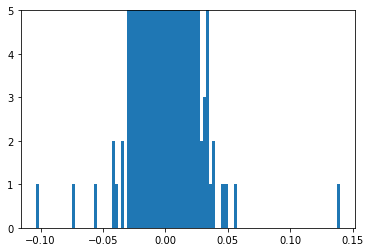

In [30]:
spec_flat = spec1.flatten() 
n, bins, patches = plt.hist(spec_flat, bins=100)
plt.ylim(0, 5)
plt.show()

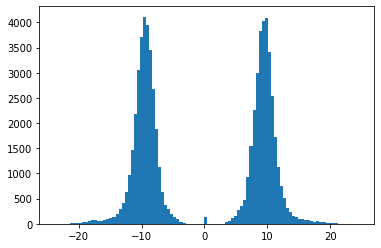

In [17]:
spec_flat = spec1.flatten()
assert (spec_flat > 0).sum() == 32735
spec_log = spec_flat.copy()
spec_log[spec_flat > 0] = np.log(spec_flat[spec_flat > 0])
spec_log[spec_flat < 0] = -1 * np.log(-1 * spec_flat[spec_flat < 0])

n, bins, patches = plt.hist(spec_log,bins=100)
plt.show()

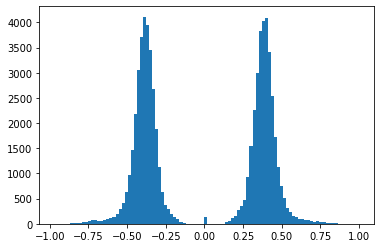

In [18]:
spec_flat = spec1.flatten()
spec_log = spec_flat.copy()
spec_log[spec_flat > 0] = np.log(spec_flat[spec_flat > 0])
spec_log[spec_flat < 0] = -1 * np.log(-1 * spec_flat[spec_flat < 0])

n, bins, patches = plt.hist(norm(spec_log),bins=100)
plt.show()

In [19]:
def logify(arr):
    log_arr = np.zeros(arr.shape)
    log_arr[arr > 0] = np.log(arr[arr > 0])
    log_arr[arr < 0] = -1 * np.log(-1 * arr[arr < 0])
    return log_arr

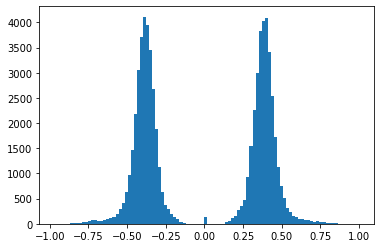

In [20]:
spec_norm = norm(logify(spec1))
spec_flat = spec_norm.flatten()
n, bins, patches = plt.hist(spec_flat,bins=100)
plt.show()

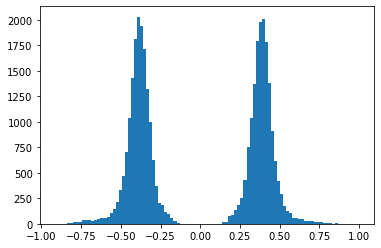

In [21]:
spec_norm = norm(logify(spec1[0, :, :]))
spec_flat = spec_norm.flatten()
n, bins, patches = plt.hist(spec_flat,bins=100)
plt.show()

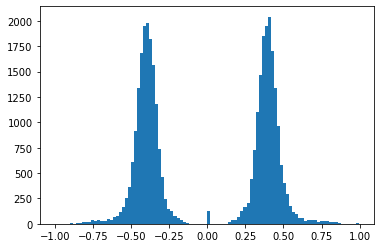

In [22]:
spec_norm = norm(logify(spec1[1, :, :]))
spec_flat = spec_norm.flatten()
n, bins, patches = plt.hist(spec_flat,bins=100)
plt.show()

In [41]:
def logify(arr):
    log_arr = np.zeros(arr.shape)
    log_arr[arr > 0] = np.log(arr[arr > 0])
    log_arr[arr < 0] = -1 * np.log(-1 * arr[arr < 0])
    return log_arr

In [56]:
def delogify(log_arr):
    arr = np.zeros(log_arr.shape)
    arr[log_arr > 0] = np.exp(log_arr[log_arr > 0])
    arr[log_arr < 0] = -1 * np.exp(-1 * log_arr[log_arr < 0])
    return arr

In [57]:
spec_1_0 = spec1[1, :, :]

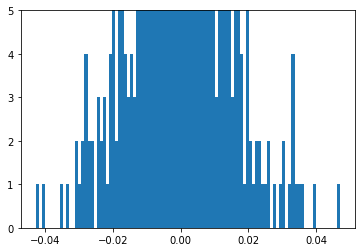

In [62]:
spec_flat = spec_1_0.flatten()
n, bins, patches = plt.hist(spec_flat,bins=100)
plt.ylim(0, 5)
plt.show()

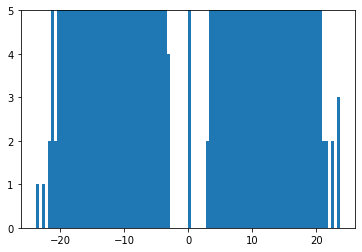

In [65]:
spec_flat = spec_1_0.flatten()
spec_norm = logify(spec_flat)
n, bins, patches = plt.hist(spec_norm,bins=100)
plt.ylim(0, 5)
plt.show()